In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
house_df = pd.read_csv('kc_house_data.csv')

In [4]:
house_df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
house_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [8]:
house_df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [9]:
house_df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [10]:
house_df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
1275.0        1
266.0         1
875.0         1
2120.0        1
2730.0        1
518.0         1
556.0         1
295.0         1
276.0         1
1798.0        1
768.0         1
4130.0        1
1960.0        1
1930.0        1
2350.0        1
2500.0        1
2390.0        1
3500.0        1
283.0         1
784.0         1
2490.0        1
792.0         1
508.0         1
1990.0        1
2600.0        1
1525.0        1
2196.0        1
602.0         1
3000.0        1
2240.0        1
Name: sqft_basement, Len

# CLEANING NOTES:
 1) Set waterfront nulls to 0, assumption: nulls mean there is no waterfront view

2) set view nulls to 0, assumption: nulls mean nobody has viewed

3) set yr_renovated 0's to nulls, assumption: 0 = no renovation has been done

4) set sqft_basement '0's & '?' to null, assumption: 0 & ? means no basement exists

In [11]:
#Scatter matrix
house_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [12]:
abs(house_df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


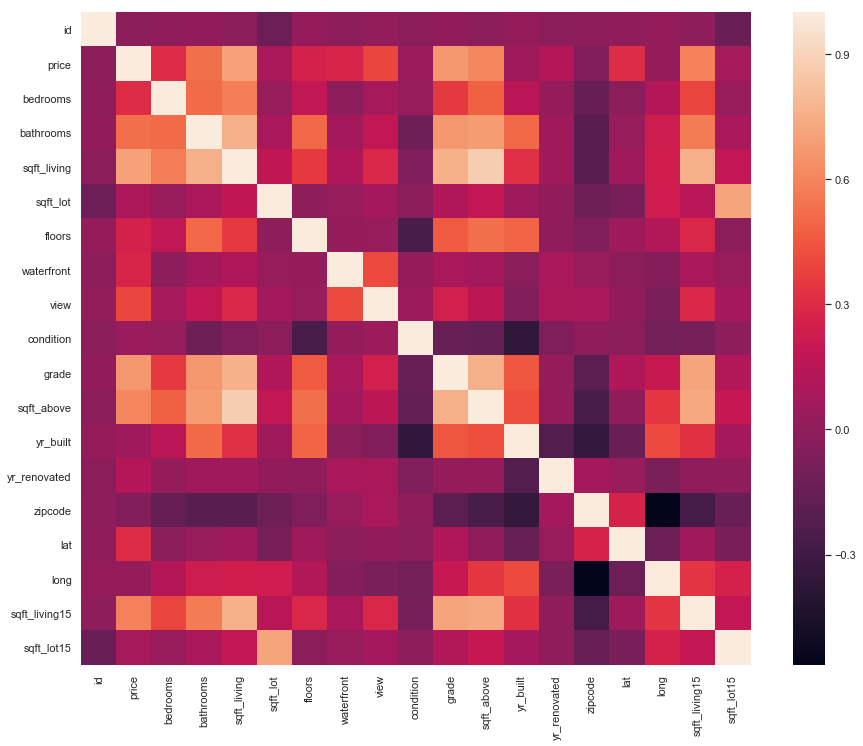

In [13]:
sns.set(rc={'figure.figsize': (15,12)})
sns.heatmap(house_df.corr());

In [14]:
house_df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.129599
floors           0.256804
waterfront       0.276295
lat              0.306692
bedrooms         0.308787
view             0.395734
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [15]:
house_df.corr()['sqft_living'].sort_values()

zipcode         -0.199802
condition       -0.059445
id              -0.012241
lat              0.052155
yr_renovated     0.055660
waterfront       0.110230
sqft_lot         0.173453
sqft_lot15       0.184342
long             0.241214
view             0.282532
yr_built         0.318152
floors           0.353953
bedrooms         0.578212
price            0.701917
bathrooms        0.755758
sqft_living15    0.756402
grade            0.762779
sqft_above       0.876448
sqft_living      1.000000
Name: sqft_living, dtype: float64

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
x_sqft_living = house_df['sqft_living']
y = house_df['price']

In [18]:
house_dff = house_df

In [19]:
model_main = ols(formula = "y~x_sqft_living", data=house_dff).fit()
print(model_main.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:56:38   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.399e+04   4410.023     -9.975

In [20]:
model_main.params

Intercept       -43988.892194
x_sqft_living      280.863014
dtype: float64

/Users/krex/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


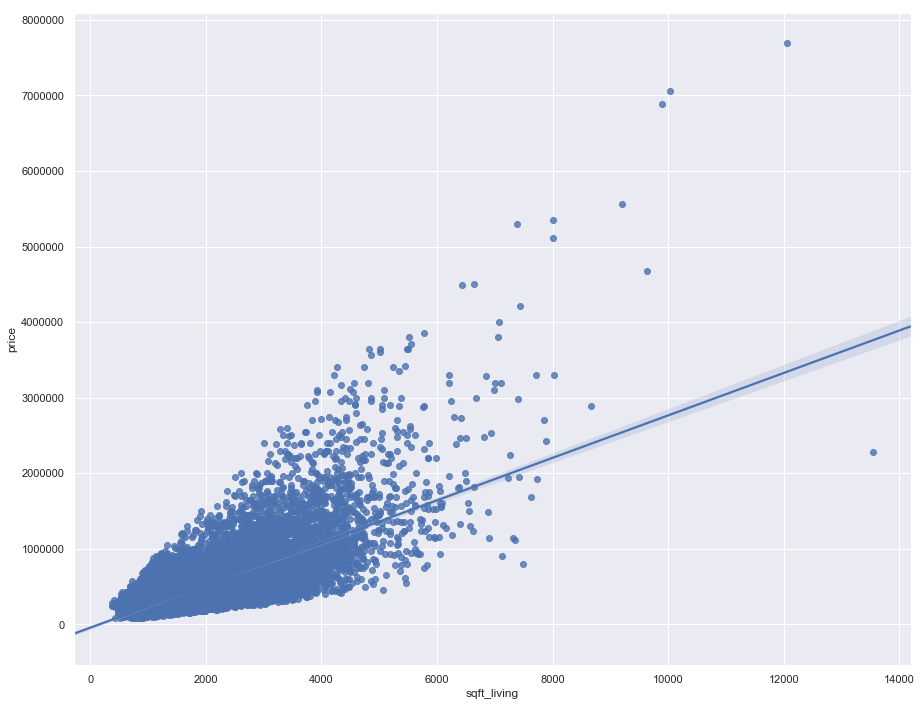

In [21]:
sns.regplot(x=x_sqft_living,y=y,data=house_df);

## Post-Modeling Observations

- There is a strong positive linear correlation between square footage of the house's living area and price of the house
- Next step is to find other variables to improve this current model
- We need to clean some variables and see if we can make sense of how it can affect our analysis

In [22]:
# CLEANING NOTES:
 #1) Set waterfront nulls to 0, assumption: nulls mean there is no waterfront view
house_dff['waterfront'] = house_dff['waterfront'].fillna(0)


In [23]:
house_dff.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [24]:
#2) set view nulls to 0, assumption: nulls mean nobody has viewed
house_dff['view'] = house_dff['view'].fillna(0)

In [25]:
#3) set yr_renovated 0's to nulls, assumption: 0 = no renovation has been done
house_dff['yr_renovated'] = house_dff['yr_renovated'].replace(0,np.nan)

In [26]:
#4) set sqft_basement '0's & '?' to null, assumption: 0 & ? means no basement exists
    #values are in str format, convert to integer?
house_dff['sqft_basement'] = house_dff['sqft_basement'].replace('0.0',np.nan)
house_dff['sqft_basement'] = house_dff['sqft_basement'].replace('?',np.nan)

In [27]:
house_dff.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement    13280
yr_built             0
yr_renovated     20853
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [28]:
house_dff.date = house_dff.date.apply(pd.Timestamp)

In [29]:
house_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    8317 non-null object
yr_built         21597 non-null int64
yr_renovated     744 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory usa

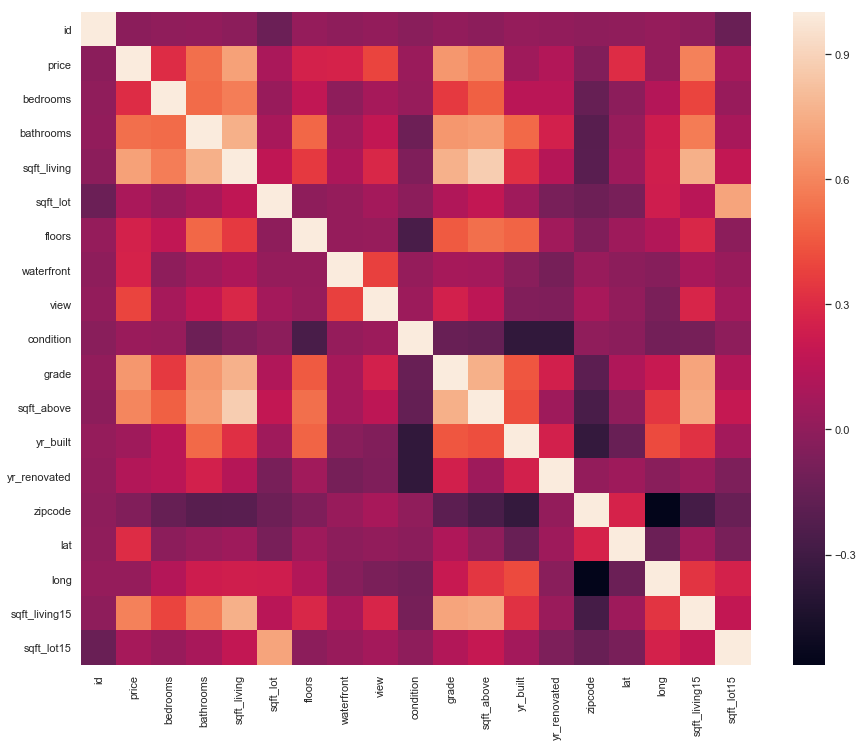

In [30]:
sns.set(rc={'figure.figsize': (15,12)})
sns.heatmap(house_dff.corr());


In [31]:
abs(house_dff.corr()) > 0.70

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [32]:
house_dff.corr()['sqft_living'].sort_values()

zipcode         -0.199802
condition       -0.059445
id              -0.012241
lat              0.052155
waterfront       0.104637
yr_renovated     0.132791
sqft_lot         0.173453
sqft_lot15       0.184342
long             0.241214
view             0.281715
yr_built         0.318152
floors           0.353953
bedrooms         0.578212
price            0.701917
bathrooms        0.755758
sqft_living15    0.756402
grade            0.762779
sqft_above       0.876448
sqft_living      1.000000
Name: sqft_living, dtype: float64

In [33]:
house_dff.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.125499
floors           0.256804
waterfront       0.264306
lat              0.306692
bedrooms         0.308787
view             0.393497
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

## Observations
1) 

In [34]:
house_dff.zipcode = house_dff.zipcode.astype(str)

In [35]:
house_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    8317 non-null object
yr_built         21597 non-null int64
yr_renovated     744 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(10), object(2)
memory us

In [36]:
house_dff['sqft_basement'] = house_dff['sqft_basement'].astype(float)

### TESTING VARIOUS X VARIABLES vs. PRICE (Y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:56:46   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.0

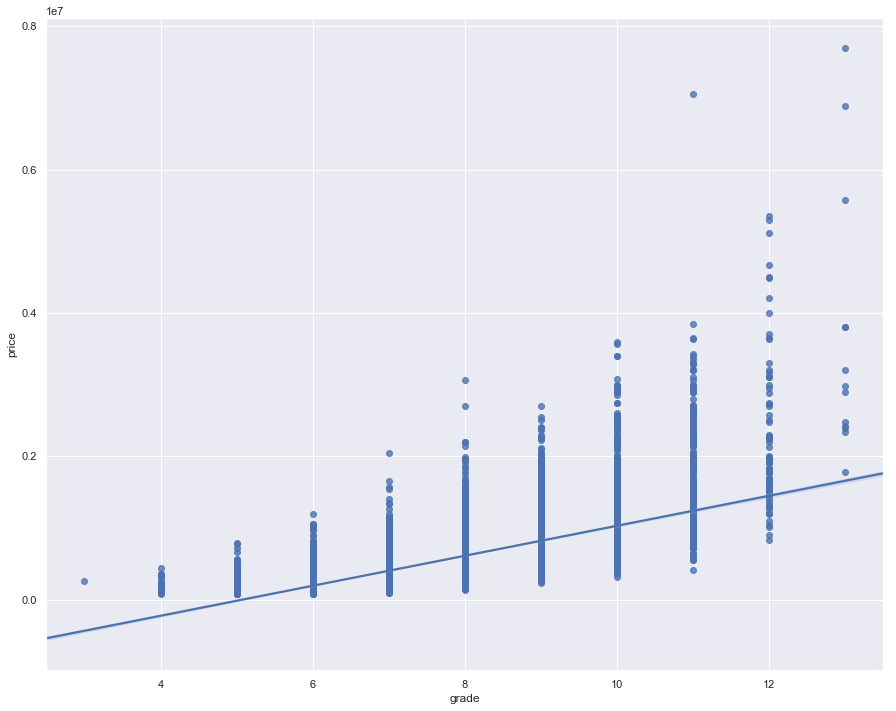

In [37]:
grade_x = house_df['grade']
model = ols(formula = "y~grade_x", data=house_dff).fit()
print(model.summary())
sns.regplot(x=grade_x,y=y,data=house_dff);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:56:49   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.976e+04   4737.581     12.613   

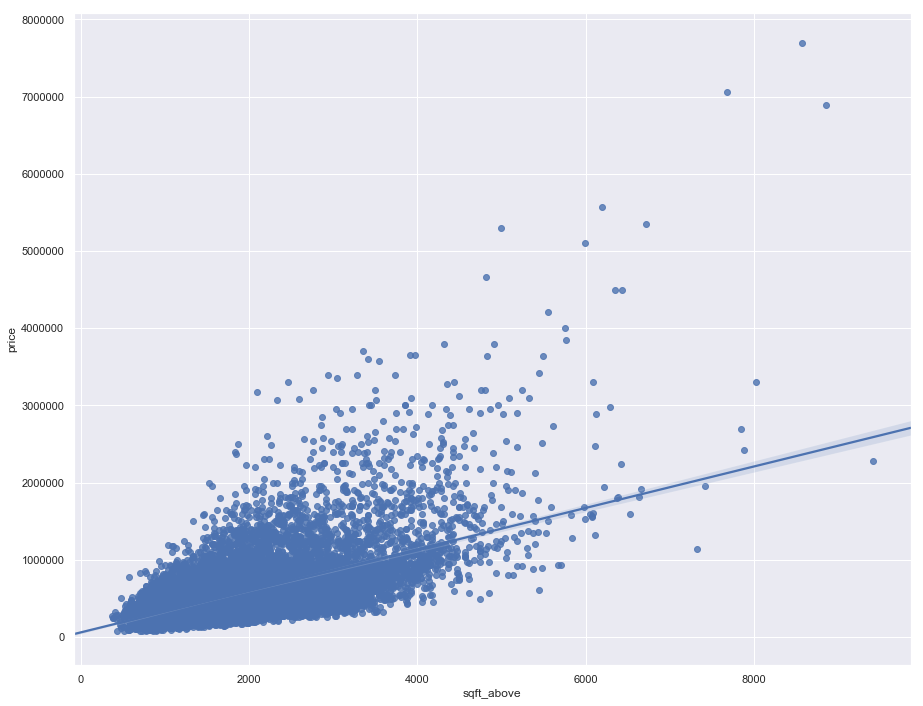

In [38]:
sqft_above_x = house_df['sqft_above']
model = ols(formula = "y~sqft_above_x", data=house_dff).fit()
print(model.summary())
sns.regplot(x=sqft_above_x,y=y,data=house_dff);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:56:52   Log-Likelihood:            -3.0286e+05
No. Observations:               21597   AIC:                         6.057e+05
Df Residuals:                   21595   BIC:                         6.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -8.303e+04   6216.659    -

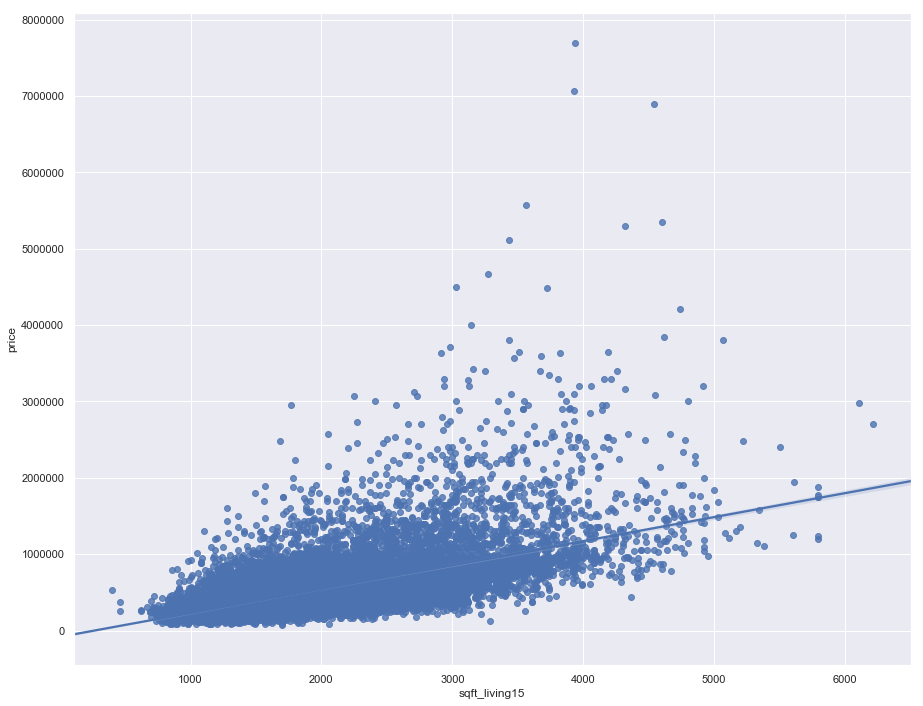

In [39]:
sqft_living15_x = house_df['sqft_living15']
model = ols(formula = "y~sqft_living15_x", data=house_dff).fit()
print(model.summary())
sns.regplot(x=sqft_living15_x,y=y,data=house_dff);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:56:54   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8712.6518   6224.769      1.400      

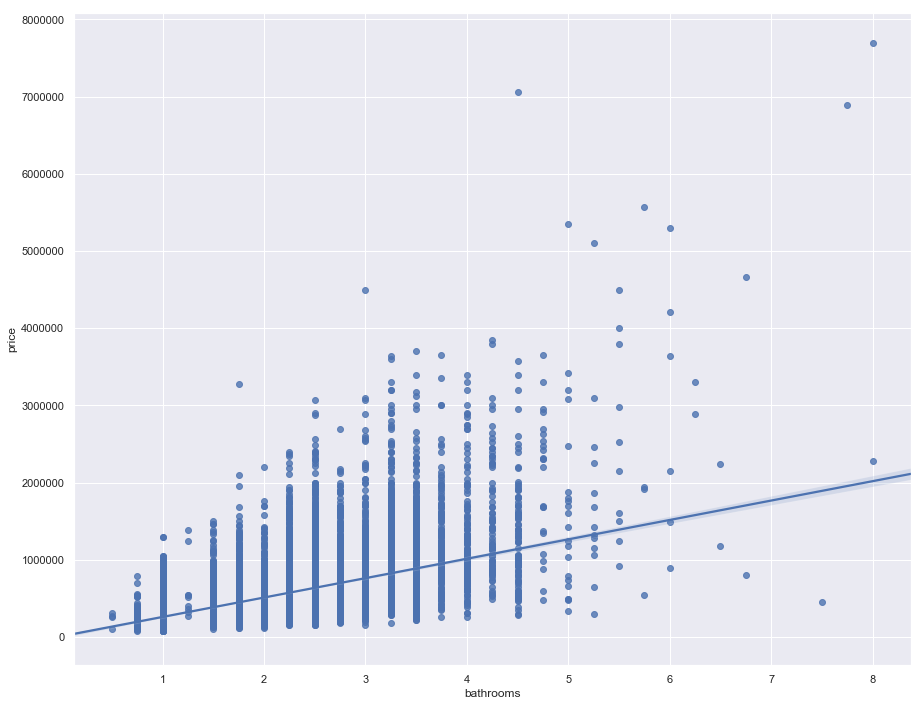

In [40]:
bathrooms_x = house_df['bathrooms']
model = ols(formula = "y~bathrooms_x", data=house_dff).fit()
print(model.summary())
sns.regplot(x=bathrooms_x,y=y,data=house_dff);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3956.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:56:56   Log-Likelihood:            -3.0557e+05
No. Observations:               21597   AIC:                         6.112e+05
Df Residuals:                   21595   BIC:                         6.112e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.962e+05   2402.665    206.527      0.0

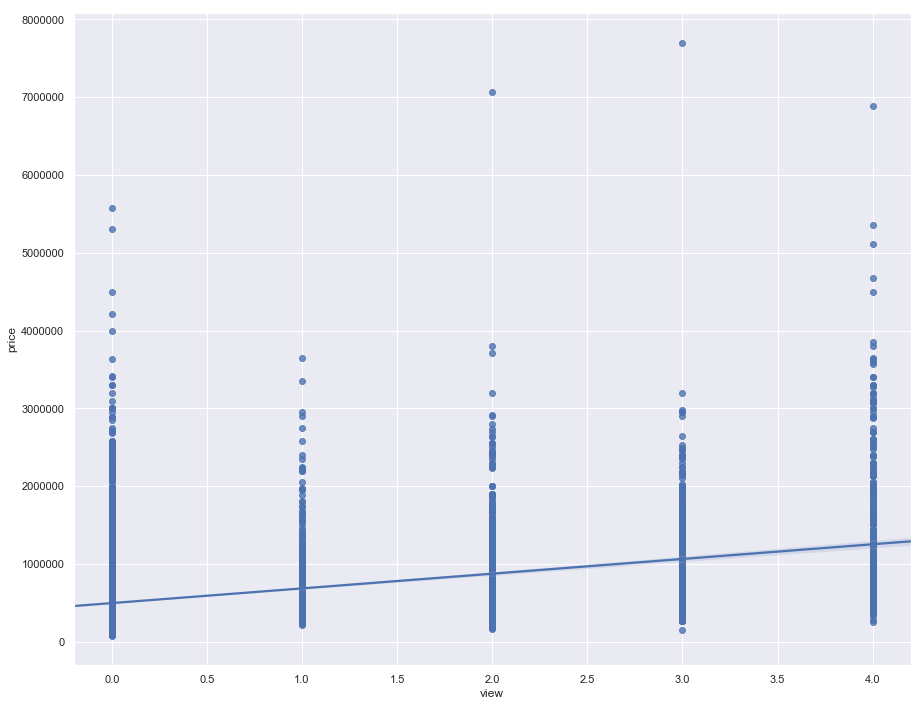

In [41]:
view_x = house_df['view']
model = ols(formula = "y~view_x", data=house_dff).fit()
print(model.summary())
sns.regplot(x=view_x,y=y,data=house_dff);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:56:59   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.272e+05   8979.293     14.166      0.0

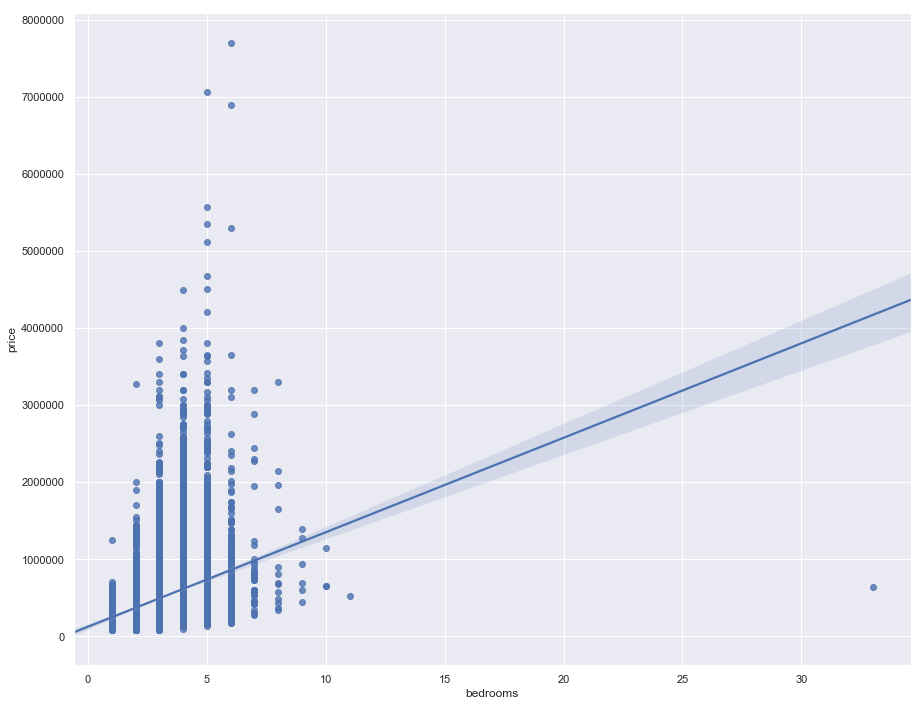

In [42]:
bedrooms_x = house_df['bedrooms']
model = ols(formula = "y~bedrooms_x", data=house_dff).fit()
print(model.summary())
sns.regplot(x=bedrooms_x,y=y, data=house_dff);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2242.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:57:01   Log-Likelihood:            -3.0632e+05
No. Observations:               21597   AIC:                         6.127e+05
Df Residuals:                   21595   BIC:                         6.127e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.814e+07   8.17e+05    -46.689      0.0

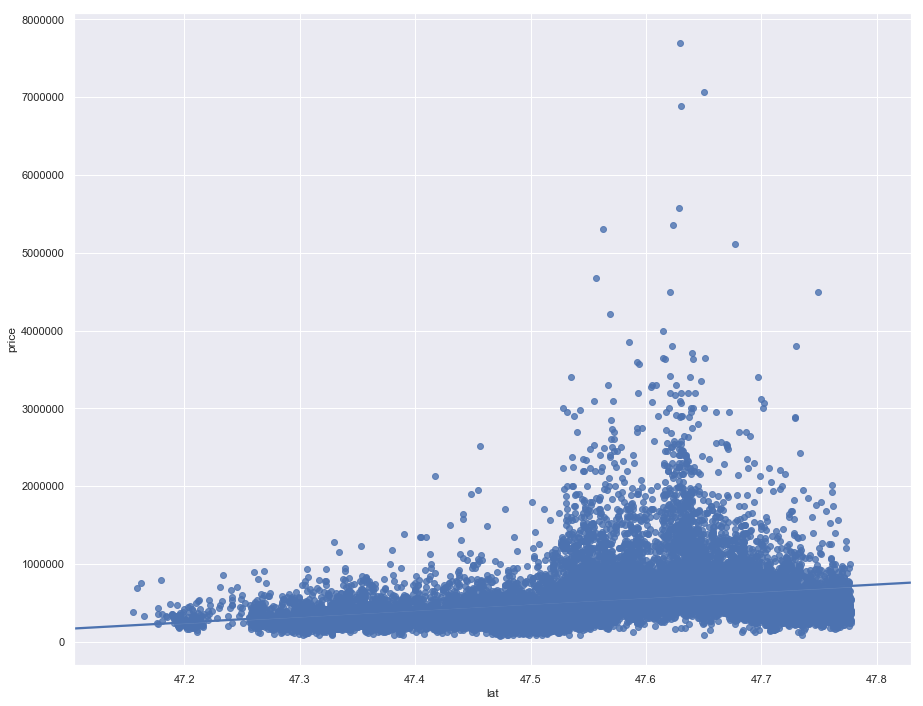

In [43]:
lat_x = house_df['lat']
model = ols(formula = "y~lat_x", data=house_dff).fit()
print(model.summary())
sns.regplot(x=lat_x,y=y, data=house_dff);

### FEATURE ENGINEERING

In [44]:
house_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    8317 non-null float64
yr_built         21597 non-null int64
yr_renovated     744 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(10), object(1)
memory u

In [45]:
house_dff['bed_bath_sum'] = house_dff['bedrooms'] + house_dff['bathrooms']

In [46]:
house_dff['renovation_yes'] = (~np.isnan(house_dff['yr_renovated'])).astype(int)

In [47]:
house_dff['sqft_living_plus_lot'] = house_dff['sqft_living'] + house_dff['sqft_lot']

In [48]:
house_dff['sqft_living_plus_lot_15'] = house_dff['sqft_living15'] + house_dff['sqft_lot15']

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     6036.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:57:03   Log-Likelihood:            -3.0473e+05
No. Observations:               21597   AIC:                         6.095e+05
Df Residuals:                   21595   BIC:                         6.095e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -9.767e+04   8504.016    -11.

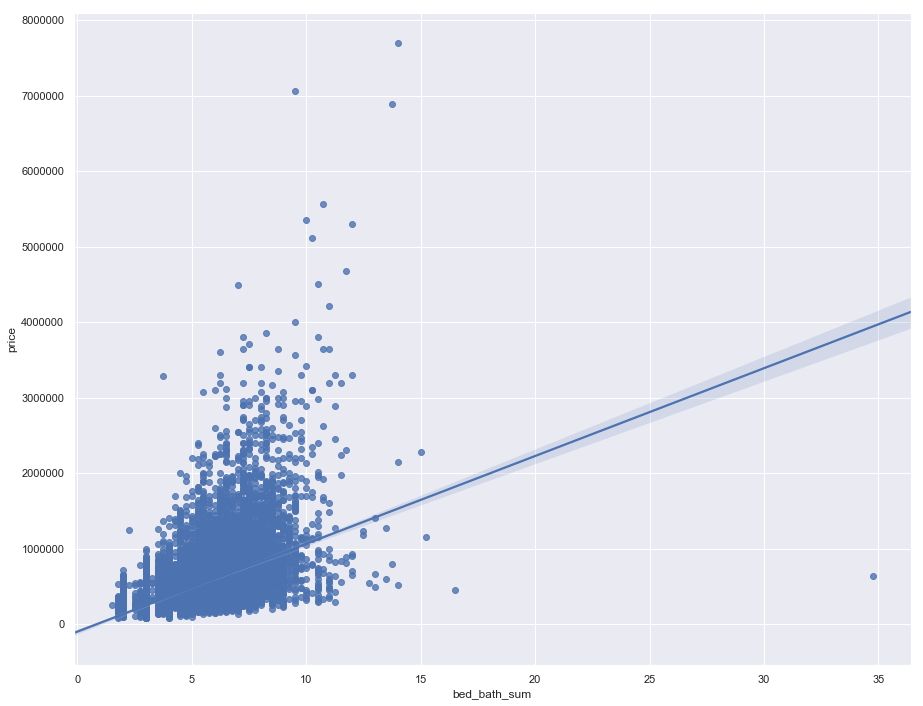

In [49]:
bed_bath_sum_x = house_df['bed_bath_sum']
model = ols(formula = "y~bed_bath_sum_x", data=house_dff).fit()
print(model.summary())
sns.regplot(x=bed_bath_sum_x,y=y, data=house_dff);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     205.4
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           2.24e-46
Time:                        16:57:05   Log-Likelihood:            -3.0729e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

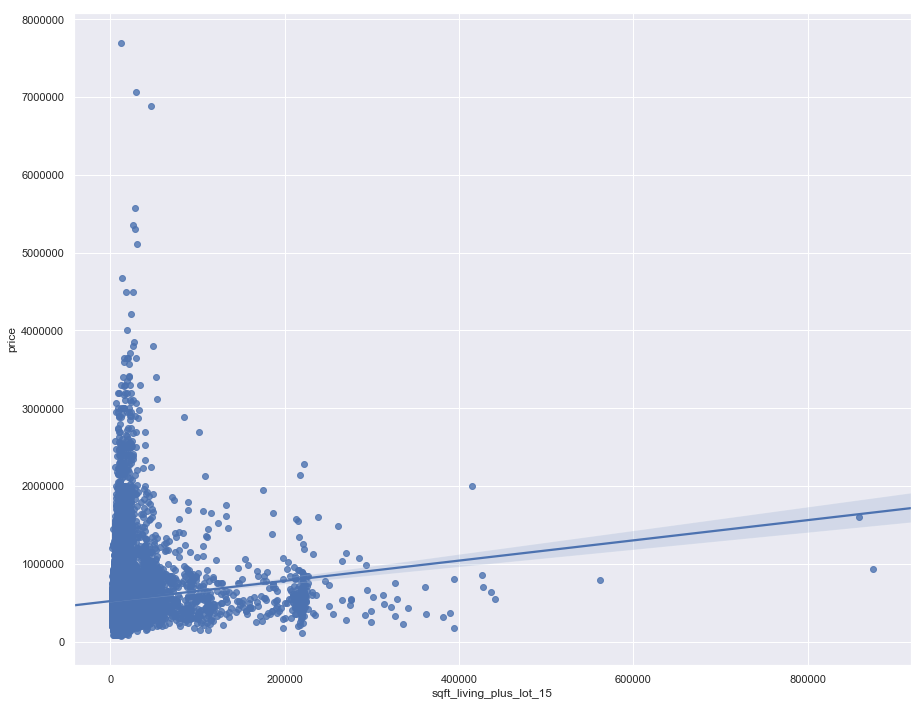

In [50]:
sqft_living_plus_lot_15_x = house_df['sqft_living_plus_lot_15']
model = ols(formula = "y~sqft_living_plus_lot_15_x", data=house_dff).fit()
print(model.summary())
sns.regplot(x=sqft_living_plus_lot_15_x,y=y, data=house_dff);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     240.8
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           5.20e-54
Time:                        16:57:07   Log-Likelihood:            -3.0727e+05
No. Observations:               21597   AIC:                         6.145e+05
Df Residuals:                   21595   BIC:                         6.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.24

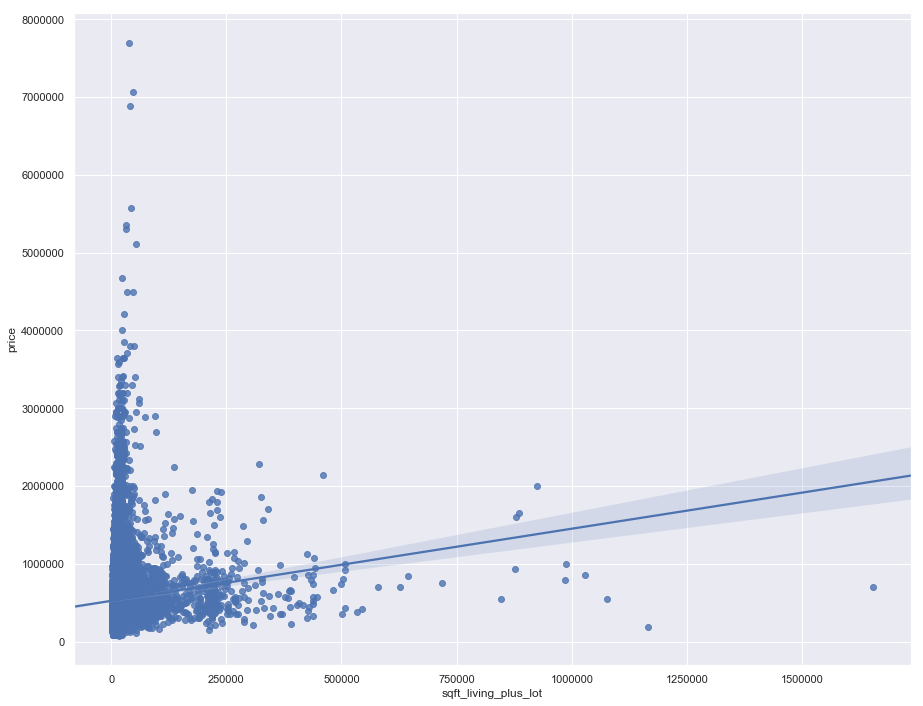

In [51]:
sqft_living_plus_lot_x = house_df['sqft_living_plus_lot']
model = ols(formula = "y~sqft_living_plus_lot_x", data=house_dff).fit()
print(model.summary())
sns.regplot(x=sqft_living_plus_lot_x,y=y, data=house_dff);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     302.5
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           2.64e-67
Time:                        16:57:09   Log-Likelihood:            -3.0724e+05
No. Observations:               21597   AIC:                         6.145e+05
Df Residuals:                   21595   BIC:                         6.145e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.321e+05   2526.424  

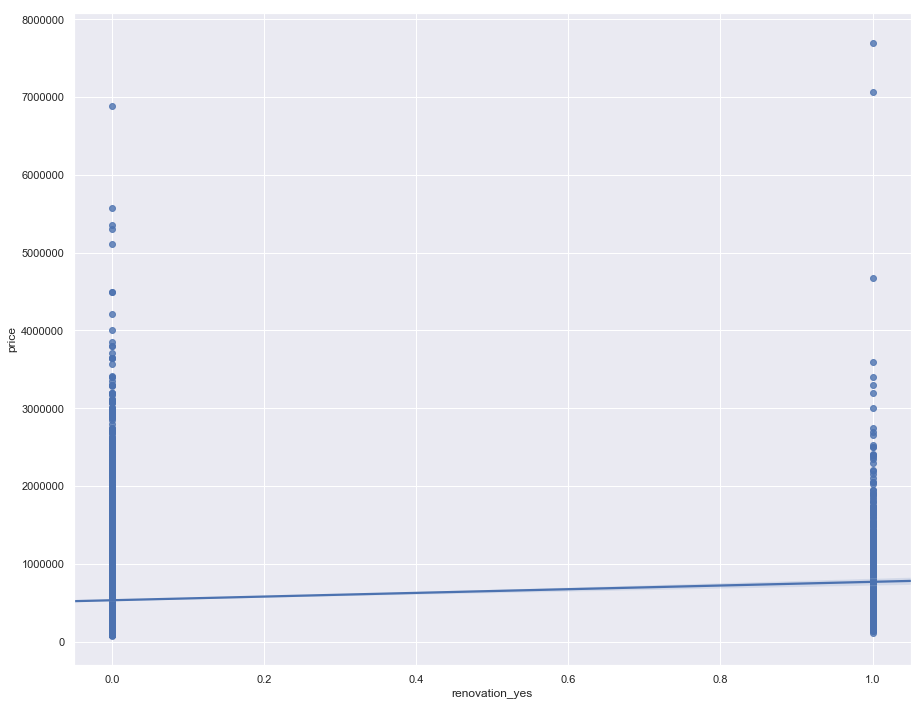

In [52]:
renovation_yes_x = house_df['renovation_yes']
model = ols(formula = "y~renovation_yes_x", data=house_dff).fit()
print(model.summary())
sns.regplot(x=renovation_yes_x,y=y, data=house_dff);

### Histogram of most related features

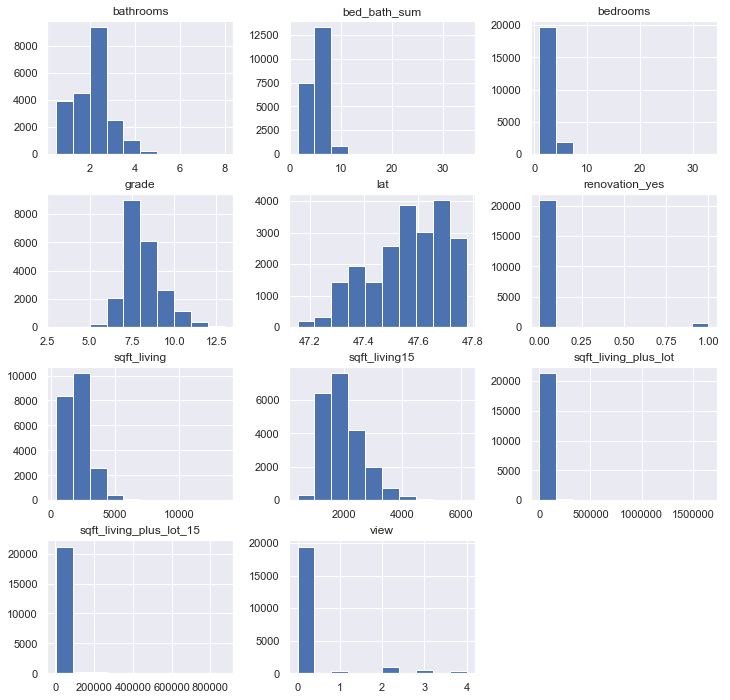

In [53]:
house_dff[["sqft_living", "grade", "sqft_living15", "bathrooms", "view", 
                                "bedrooms", "lat", "bed_bath_sum", "sqft_living_plus_lot_15", 
                                "sqft_living_plus_lot", "renovation_yes"]].hist(figsize=[12,12]);

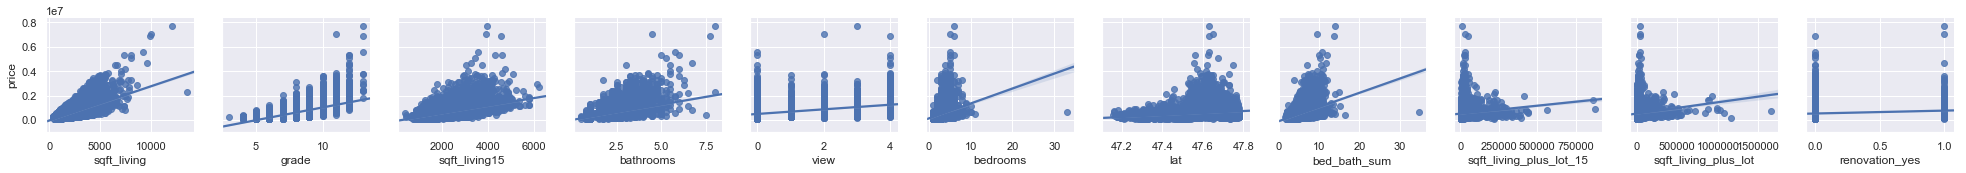

In [54]:
sns.pairplot(house_dff, x_vars=["sqft_living", "grade", "sqft_living15", "bathrooms", "view", 
                                "bedrooms", "lat", "bed_bath_sum", "sqft_living_plus_lot_15", 
                                "sqft_living_plus_lot", "renovation_yes"],
             y_vars="price",kind = 'reg');

In [55]:
house_df5 = house_dff[['price','sqft_living','grade','sqft_above','sqft_living15','bathrooms','view']]

In [56]:
house_df5.head()

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view
0,221900.0,1180,7,1180,1340,1.00,0.0
1,538000.0,2570,7,2170,1690,2.25,0.0
2,180000.0,770,6,770,2720,1.00,0.0
3,604000.0,1960,7,1050,1360,3.00,0.0
4,510000.0,1680,8,1680,1800,2.00,0.0


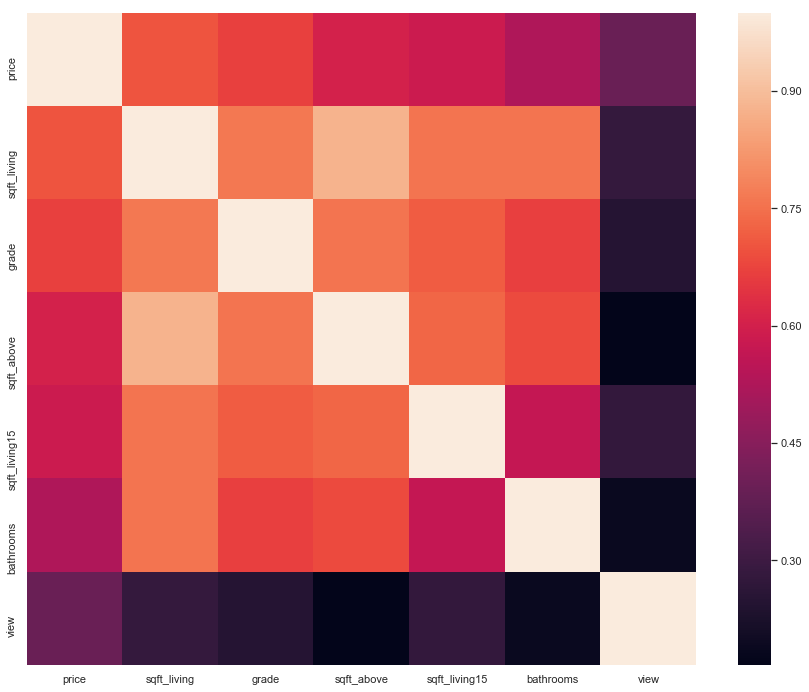

In [57]:
sns.set(rc={'figure.figsize': (15,12)})
sns.heatmap(house_df5.corr());


In [58]:
abs(house_df5.corr()) >.75

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view
price,True,False,False,False,False,False,False
sqft_living,False,True,True,True,True,True,False
grade,False,True,True,True,False,False,False
sqft_above,False,True,True,True,False,False,False
sqft_living15,False,True,False,False,True,False,False
bathrooms,False,True,False,False,False,True,False
view,False,False,False,False,False,False,True


## Observations
1) sqft_living and sqft_above have corr. of over .8

2) grade,sqft_above,sqft_living15,bathrooms all have a corr of over .75

3) for mutl-lin tests, attempt to silence sqft_living and compare other variables. Then re-introduce sqft_living to see if model improves

## MULTIPLE LINEAR REGRESSION WORK

In [59]:
import statsmodels.api as sm

In [60]:
X = house_df5[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view']]
y = house_df5['price']



In [61]:
predictors = np.asarray(X) #set predictors as numpy array of capital X
predictors_int = sm.add_constant(predictors) #.add_constant
model = sm.OLS(y,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     4879.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:57:32   Log-Likelihood:            -2.9814e+05
No. Observations:               21597   AIC:                         5.963e+05
Df Residuals:                   21590   BIC:                         5.963e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.808e+05   1.32e+04    -43.957      0.000   -6.07e+05   -5.55e+05
x1           208.9722      4.466     46.788      0.000     200.218     217.727
x2          1.043e+05   2392.732     43.592      0.000    9.96e+04    1.09e+05
x3           -43.2607      4.405     -9.820      0.000     -51.895     -34.626
x4             3.5551      3.921      0.907      0.365      -4.130      11.240
x5         -2.993e+04   3324.164     -9.004      0.000   -3.64e+04   -2.34e+04
x6          9.099e+04   2288.621     39.757      0.000    8.65e+04    9.55e+04
==============================================================================
Omnibus:                    16773.501   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1137722.841
Skew:                           3.196   Prob(JB):                         0.00
Kurtosis:                      37.978   Cond. No.                     2.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [63]:
ss = StandardScaler()

X_scaled = ss.fit_transform(X)


/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krex/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [64]:
np.random.seed(33)

X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,y)

In [65]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
lr.score(X_test,Y_test) #r**2 value

0.583661766806034

In [67]:
lr.coef_

array([184447.68178083, 124432.51413401, -34290.65809622,   7131.70854334,
       -25105.00963328,  65510.10177591])

In [68]:
r_2 = metrics.r2_score(Y_test, lr.predict(X_test))
mae = metrics.mean_absolute_error(Y_test, lr.predict(X_test))
mse = metrics.mean_squared_error(Y_test, lr.predict(X_test))

## BENCHMARKS: Simple Linear (price vs. sqft_living) & Multiple Linear (price vs. Top 6)

#### Simple Linear Regression (price vs. sqft_living)

In [69]:
model_main.params[1]

280.86301435887435

In [70]:
np.array(x_sqft_living)

array([1180, 2570,  770, ..., 1020, 1600, 1020])

Intercept       -43988.892194

x_sqft_living      280.863014

dtype: float64

In [71]:
y_predicted_single_var = (np.array(x_sqft_living)*model_main.params[1])+model_main.params[0]

In [72]:
#PRICE vs. sqft_living BENCHMARK

print(f'Our predictor: {x_sqft_living.name}')
print(f"The R-squared score of our test is {model_main.rsquared}")
print(f"The MAE score of our test is {metrics.mean_absolute_error(y, y_predicted_single_var)}")
print(f"The MSE score of our test is {model_main.mse_total}")

Our predictor: sqft_living
The R-squared score of our test is 0.49268789904035093
The MAE score of our test is 173824.88749617475
The MSE score of our test is 134959350361.55782


#### Multiple Linear Regression (price vs. Top 6)

In [73]:
#PRICE vs. TOP 6 BENCHMARK
print(f'Our list of predictors: {X.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")

Our list of predictors: Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view'],
      dtype='object')
The R-squared score of our test is 0.583661766806034
The MAE score of our test is 156427.72770836053
The MSE score of our test is 60446880159.72602


## Observations

- SIMPLE MODEL: Without taking into account multicollinearity, our MAE and MSE scores are MASSIVE! But its okay, gives us a baseline of what to improve upon for our next model.
- MULTIVARIABLE MODEL: By including out Top 6 variables instead of simply the sqft_living variable, we saw improvments in model quality in all 3 important metrics: R-squared, MAE, and MSE
- The improvement in R-Squarred was marginal, and we have not yet made modifications to our Multivariable model based on potential multicollinearity.

In [75]:
house_dff.to_csv('house_data_cleaned.csv',index=False)